In [1]:
# Data Import

import matplotlib.pyplot as plt
import pandas
import os
here = os.path.dirname("C:/Users/Feli/Documents/NTHU/DataMining/Lab/DMLab1/NewDataset") if "__file__" in locals() else "."

files = [("amazon", "C:/Users/Feli/Documents/NTHU/DataMining/Lab/DMLab1/NewDataset/sentiment labelled sentences/amazon_cells_labelled.txt"),
         ("imdb", "C:/Users/Feli/Documents/NTHU/DataMining/Lab/DMLab1/NewDataset/sentiment labelled sentences/imdb_labelled.txt"),
         ("yelp", "C:/Users/Feli/Documents/NTHU/DataMining/Lab/DMLab1/NewDataset/sentiment labelled sentences/yelp_labelled.txt")]
    
dfs = []

# 3. Data Transformation: Pandas Dataframe

for provider, name in files:
    df = pandas.read_csv(name, sep="\t")
    df.columns = ["sentence", "label"]
    df["provider"] = provider
    dfs.append(df)

data = pandas.concat(dfs, axis=0)

# visualization of some records in table form
print(data.head(6))
print("shape", data.shape)

                                            sentence  label provider
0                        Good case, Excellent value.      1   amazon
1                             Great for the jawbone.      1   amazon
2  Tied to charger for conversations lasting more...      0   amazon
3                                  The mic is great.      1   amazon
4  I have to jiggle the plug to get it to line up...      0   amazon
5  If you have several dozen or several hundred c...      0   amazon
shape (2745, 3)


In [2]:
categories = ["amazon","imdb", "yelp"]

#data1 = data.query('(provider=="amazon")').label.value_counts()
data_0 = data[data.label==0].provider.value_counts()
data_1 = data[data.label==1].provider.value_counts()

print(data_0,"\n")
print(data_1)

yelp      500
amazon    499
imdb      361
Name: provider, dtype: int64 

amazon    500
yelp      499
imdb      386
Name: provider, dtype: int64


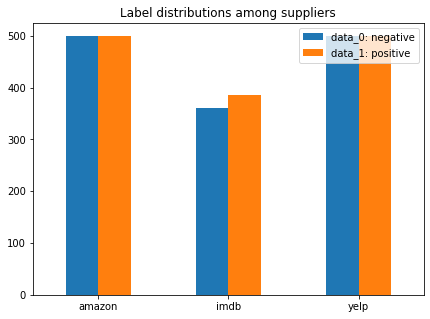

In [3]:
import pandas as pd

df1 = pd.DataFrame({'data_0: negative': data_0,'data_1: positive': data_1}, index=categories)
ax = df1.plot.bar(rot=0, title = 'Label distributions among suppliers',figsize = (7,5))
ax.legend(loc = 'upper right')

# the bar below shows that the dataset contains for each supplier approximately the same number of positive and negative
# labeled sentences
# for amazon and yelp the dataset contains more entries than for imdb

In [4]:
categories = ["amazon","imdb", "yelp"]

#data1 = data.query('(provider=="amazon")').label.value_counts()
data_0 = data[data.label==0].provider.value_counts()
data_1 = data[data.label==1].provider.value_counts()

print(data_0,"\n")
print(data_1)

yelp      500
amazon    499
imdb      361
Name: provider, dtype: int64 

amazon    500
yelp      499
imdb      386
Name: provider, dtype: int64


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence)

# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

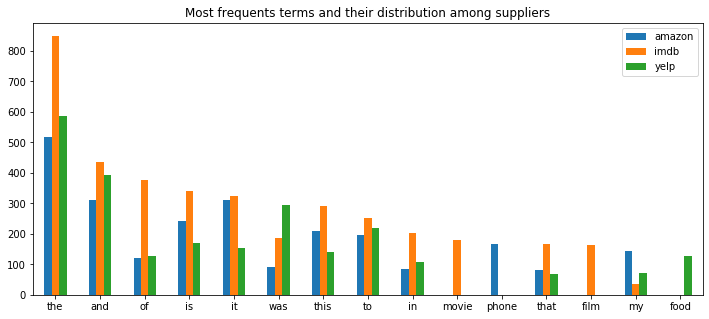

In [77]:
import numpy as np

count_vect = CountVectorizer()

data_counts_amazon = count_vect.fit_transform(data[data.provider=="amazon"].sentence)
x_amazon = count_vect.get_feature_names()

data_counts_imdb = count_vect.fit_transform(data[data.provider=="imdb"].sentence)
x_imdb = count_vect.get_feature_names()

data_counts_yelp = count_vect.fit_transform(data[data.provider=="yelp"].sentence)
x_yelp = count_vect.get_feature_names()


    
term_frequencies_amazon = np.asarray(data_counts_amazon.sum(axis=0))[0]
term_frequencies_imdb = np.asarray(data_counts_imdb.sum(axis=0))[0]
term_frequencies_yelp = np.asarray(data_counts_yelp.sum(axis=0))[0]

df_amazon = pd.DataFrame(np.transpose(term_frequencies_amazon), columns = ["amazon"], index = x_amazon)
df_imdb = pd.DataFrame(np.transpose(term_frequencies_imdb), columns = ["imdb"], index = x_imdb)
df_yelp = pd.DataFrame(np.transpose(term_frequencies_yelp), columns = ["yelp"], index = x_yelp)
df_amazon = np.transpose(df_amazon)
df_imdb = np.transpose(df_imdb)
df_yelp = np.transpose(df_yelp)

df_new=pd.concat([df_amazon, df_imdb, df_yelp], sort=False)


df_new = df_new.loc[:, df_new.max().sort_values(ascending=False).index]

df_new= df_new.iloc[::, 0:15]


    
df_new=np.transpose(df_new)

ax = df_new.plot.bar(rot=0, title = 'Most frequents terms and their distribution among suppliers',figsize = (12,5))
